#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*   Carlos Enríquez Gorgonio A01793102
*   Fernando Ramírez Gómez A01298109
*   Francisco Javier Ramírez Arias A01316379
*   Jessica Lechuga Ramos A01793512
*   Moisés Rangel Silva A00143704


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [45]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split #Para hacer las particiones
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score         

from sklearn.metrics import classification_report, make_scorer
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Considerar librería que añada archivos .asc o revisar si la pasndas tiene esa capacidad

# **Ejercicio-1.** 

Carga los datos y sustituye los nombres de las columnas del alemán al inglés de acuerdo a como 
se indica en la página de la UCI.  
NOTA: Si lo deseas, puedes traducirlos y ponerlas en español. 

In [6]:
#Ruta del archivo a descargarse
#Usamos el mismo metodo read_csv, con el argumento s+, para identificar los espacios en vez de separacion por coma
df= pd.read_csv('SouthGermanCredit.asc', sep='\s+')
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


Así, con base a datos históricos, el objetivo es predecir si una persona es clasificada como confiable a la
asignación de un crédito, o no lo es. La variable de salida se llama “credit_risk”.

* Number of Instances:  1000
* Number of Attributes german: 20 (7 numerical, 13 categorical)
* Number of Attributes german.numer: 24 (24 numerical)

* Attribute description

 * Attribute 1:  (qualitative) [status]
	- Status of existing checking account
    - A11 :      ... <    0 DM
	- A12 : 0 <= ... <  200 DM
	- A13 :      ... >= 200 DM /salary assignments for at least 1 year
    - A14 : no checking account

 * Attribute 2:  (numerical) [duration]
	- Duration in month

 * Attribute 3:  (qualitative) [credit_history]
	- Credit history
	- A30 : no credits taken/all credits paid back duly
    - A31 : all credits at this bank paid back duly
	- A32 : existing credits paid back duly till now
    - A33 : delay in paying off in the past
	- A34 : critical account/other credits existing (not at this bank)

 * Attribute 4:  (qualitative) [purpose]
	- Purpose
	- A40 : car (new)
	- A41 : car (used)
	- A42 : furniture/equipment
	- A43 : radio/television
	- A44 : domestic appliances
	- A45 : repairs
	- A46 : education
	- A47 : (vacation - does not exist?)
	- A48 : retraining
	- A49 : business
	- A410 : others

 * Attribute 5:  (numerical) [credit_amount]
	- Credit amount

 * Attibute 6:  (qualitative) [savings]
	- Savings account/bonds
	- A61 :          ... <  100 DM
	- A62 :   100 <= ... <  500 DM
	- A63 :   500 <= ... < 1000 DM
	- A64 :          .. >= 1000 DM
    - A65 :   unknown/ no savings account

 * Attribute 7:  (qualitative) [employment_duration]
	- Present employment since
	- A71 : unemployed
	- A72 :       ... < 1 year
	- A73 : 1  <= ... < 4 years  
	- A74 : 4  <= ... < 7 years
	- A75 :       .. >= 7 years

 * Attribute 8:  (numerical) [installment_rate]
	- Installment rate in percentage of disposable income

 * Attribute 9:  (qualitative) [personal_status_sex]
	- Personal status and sex
	- A91 : male   : divorced/separated
	- A92 : female : divorced/separated/married
    - A93 : male   : single
	- A94 : male   : married/widowed
	- A95 : female : single

 * Attribute 10: (qualitative) [other_debtors]
	- Other debtors / guarantors
	- A101 : none
	- A102 : co-applicant
	- A103 : guarantor

 * Attribute 11: (numerical) [present_residence]
	- Present residence since

 * Attribute 12: (qualitative) [property]
	- Property
	- A121 : real estate
	- A122 : if not A121 : building society savings agreement/life insurance
    - A123 : if not A121/A122 : car or other, not in attribute 6
	- A124 : unknown / no property

 * Attribute 13: (numerical) [age]
	- Age in years

 * Attribute 14: (qualitative) [other_installment_plans]
	- Other installment plans 
	- A141 : bank
	- A142 : stores
	- A143 : none

 * Attribute 15: (qualitative) [housing]
	- Housing
	- A151 : rent
	- A152 : own
	- A153 : for free

 * Attribute 16: (numerical) [number_credits]
    - Number of existing credits at this bank

 * Attribute 17: (qualitative) [job]
	- Job
	- A171 : unemployed / unskilled  - non-resident
	- A172 : unskilled - resident
	- A173 : skilled employee / official
	- A174 : management/ self-employed / highly qualified employee/ officer

 * Attribute 18: (numerical) [people_liable]
	- Number of people being liable to provide maintenance for

 * Attribute 19: (qualitative) [telephone]
	- Telephone
	- A191 : none
	- A192 : yes, registered under the customers name


 * Attribute 20: (qualitative) [foreign_worker]
	- foreign worker
	- A201 : yes
	- A202 : no

* Attribute 20: (qualitative) [credit_risk]
	- foreign worker
	- A201 : yes
	- A202 : no

In [7]:
#Carga los datos y sustituye los nombres de las columnas del alemán al inglés de acuerdo a como se indica en la página de la UCI.
df.rename(columns = {
    'laufkont':'status',
    'laufzeit':'duration',
    'moral':'credit_history',
    'verw':'purpose',
    'hoehe':'amount',
    'sparkont':'savings',
    'beszeit':'employment_duration',
    'rate':'installment_rate',
    'famges':'personal_status_sex',
    'buerge':'other_debtors',
    'wohnzeit':'present_residence',
    'verm':'property',
    'alter':'age',
    'weitkred':'other_installment_plans',
    'wohn':'housing',
    'bishkred':'number_credits',
    'beruf':'job',
    'pers':'people_liable',
    'telef':'telephone',
    'gastarb':'foreign_worker',
    'kredit':'credit_risk'
}, inplace = True)
#El inplace true, nos permite hacer la mutación sobre el mismo dataframe, sin necesidad d ecrear otro nuevo
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


# **Ejercicio-2.**

Realiza una partición de los datos en el conjunto de entrenamiento del 85% y el de prueba de 
15%. Los modelos se estarán entrenando con el método de validación cruzada, así que no es 
necesario en este paso generar el conjunto de validación. Define como la variable X a todas las 
variables de entrada y a la variable Y como la variable de salida. 

In [70]:
#Creación de espacios validación y prueba

#Determinamos las columnas que tenga el eje x
X = df.iloc[:,0:20]

#Determinamos las columnas que contendra el eje y
y = df.iloc[:, -1]

#creamos nuestros datos de validación con la función trains_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.85, random_state=10)

X_train.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
548,2,12,2,0,1007,4,3,4,4,1,1,1,22,3,2,1,3,2,1,2
335,1,24,2,2,1747,1,2,4,3,2,1,2,24,3,2,1,2,2,1,1
793,1,12,2,6,795,1,2,4,2,1,4,2,53,3,2,1,3,2,1,2
848,2,36,2,3,2671,2,3,4,2,2,4,4,50,3,3,1,3,2,1,2
295,4,36,2,1,8133,1,3,1,2,1,2,2,30,1,2,1,3,2,1,2


In [9]:
X_train.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,2.595294,20.462353,2.527059,2.851765,3216.104706,2.121176,3.384706,2.981176,2.690588,1.155294,2.852941,2.34000,35.603529,2.663529,1.924706,1.402353,2.900000,1.848235,1.403529,1.963529
std,1.260425,11.726531,1.077600,2.762129,2748.335186,1.590060,1.228442,1.114049,0.714666,0.491987,1.102849,1.04928,11.464257,0.716431,0.524074,0.570573,0.651627,0.359004,0.490894,0.187568
min,1.000000,4.000000,0.000000,0.000000,250.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,12.000000,2.000000,1.000000,1374.000000,1.000000,3.000000,2.000000,2.000000,1.000000,2.000000,1.00000,27.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
50%,2.000000,18.000000,2.000000,2.000000,2301.500000,1.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.00000,33.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
75%,4.000000,24.000000,4.000000,3.000000,3959.000000,3.000000,5.000000,4.000000,3.000000,1.000000,4.000000,3.00000,42.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
max,4.000000,72.000000,4.000000,10.000000,15945.000000,5.000000,5.000000,4.000000,4.000000,3.000000,4.000000,4.00000,75.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


#**Ejercicio-3.**

Como una primera aproximación (baseline) realizarás las siguientes transformaciones mínimas 
para generar los primeros modelos. En la misma página de la UCI se indica el tipo de variable de 
cada uno de los factores. Definen cuatro tipo de variables: categórica (categorical), ordinal 
(discretized quantitative), numérica (quantitative) y binaria (binary). Con base a dicha 
información realiza un Pipeline que incluya al menos las siguientes transformaciones: 

a.  Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable (decide y justifica que tipo de imputación realizas en cada caso). 

b.  Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica una transformación que escale a todas ellas en un rango equiparable. 

c.  Aplica la transformación One-Hot encoding a las variables de entrada de tipo categórico y  binaria. En particular, justifica por qué una variable binaria requeriría que se le aplique la transformación one-hot encoding. Por el momento dejar las variables ordinales sin  transformar. 

In [11]:
#Ejercicio 3
#Columnas categoricas
df_cate = ['status','credit_history','purpose','savings','personal_status_sex','other_debtors','other_installment_plans','housing','telephone']
#columnas ordinales o discretas cuatntitativas=beszeit,rate,wohnzeit,bishkred,beruf, pers
df_ord = ['employment_duration','installment_rate','present_residence','property','number_credits','job']
#columnas numericas o cuantitativas = laufzeit,hoehe
df_num = ['duration','amount','age']
#columnas binarias= pers,telef,gastarb,kredit
df_bin = ['people_liable','telephone','foreign_worker']

In [46]:
#Revisión de los posibles valores de cada propiedad categoricas
for n in df_cate:
  print(n + ": ", X_train[n].unique())

status:  [2 1 4 3]
credit_history:  [2 4 0 3 1]
purpose:  [ 0  2  6  3  1  5  9  8 10  4]
savings:  [4 1 2 5 3]
personal_status_sex:  [4 3 2 1]
other_debtors:  [1 2 3]
other_installment_plans:  [3 1 2]
housing:  [2 3 1]
telephone:  [1 2]


In [47]:
#Revisión de los posibles valores de cada propiedad ordinal
for n in df_ord:
  print(n + ": ", X_train[n].unique())

employment_duration:  [3 2 1 4 5]
installment_rate:  [4 1 2 3]
present_residence:  [1 4 2 3]
property:  [1 2 4 3]
number_credits:  [1 2 3 4]
job:  [3 2 1 4]


In [48]:
#Revisión de los posibles valores de cada propiedad binarias
for n in df_bin:
  print(n + ": ", X_train[n].unique())

people_liable:  [2 1]
telephone:  [1 2]
foreign_worker:  [2 1]


In [49]:
#Ejercicio 3.a
#Revisión de nulos en el DataFrame
X_train.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
dtype: int64

In [50]:
#Revisión de faltantes en el DataFrame
X_train.isna().any()

status                     False
duration                   False
credit_history             False
purpose                    False
amount                     False
savings                    False
employment_duration        False
installment_rate           False
personal_status_sex        False
other_debtors              False
present_residence          False
property                   False
age                        False
other_installment_plans    False
housing                    False
number_credits             False
job                        False
people_liable              False
telephone                  False
foreign_worker             False
dtype: bool

<AxesSubplot: >

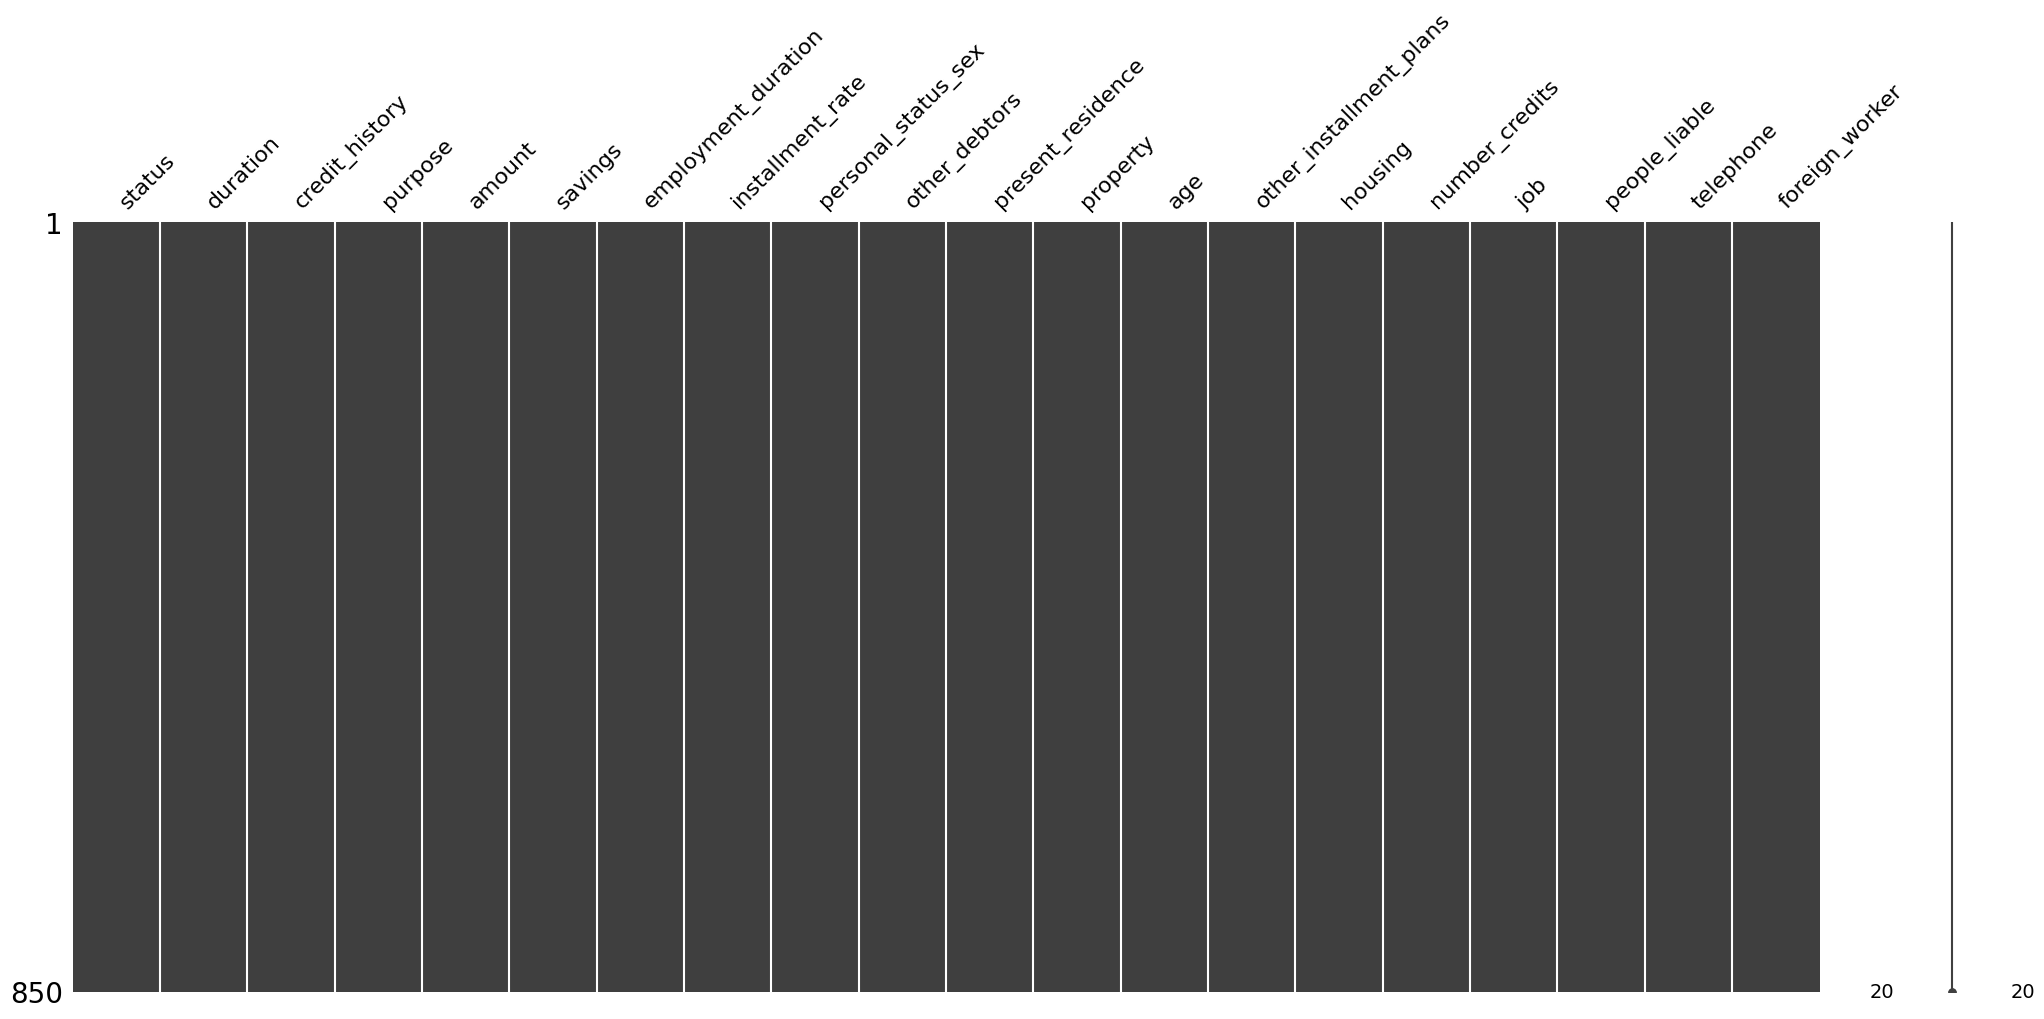

In [51]:
#Revisión de datos faltantes
msno.matrix(X_train)


### Ejercicio 3.a Justificación 
La imputación de los datos no se llevo a cabo puesto que en el conjunto de datos de entrenamiento no tiene datos nulos, datos faltantes o datos con ceros en las variables númericas ('duration','amount','age').

Ejercicio 3.b Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica una 
transformación que escale a todas ellas en un rango equiparable.

In [68]:

df_num_pip = Pipeline(steps = [('scalar', MinMaxScaler(feature_range=(1,2))),('sqrt', FunctionTransformer(np.log))])
X_train_num = X_train[df_num].copy()
df_num_pip.fit(X_train[df_num], y_val)

Pipeline(steps=[('scalar', MinMaxScaler(feature_range=(1, 2))),
                ('sqrt', FunctionTransformer(func=<ufunc 'log'>))])

In [71]:
df_num_pip.score(X_train[df_num], y_val)

AttributeError: 'FunctionTransformer' object has no attribute 'score'

In [65]:
X_train[df_num]

,duration,amount,age
548,12,1007,22
335,24,1747,24
793,12,795,53
848,36,2671,50
295,36,8133,30
...,...,...,...
320,10,1597,40
527,12,2930,27
996,24,2303,45
125,24,5103,47


Pipeline(steps=[('scalar', MinMaxScaler(feature_range=(1, 2))),
                ('sqrt', FunctionTransformer(func=<ufunc 'log'>))])

#**Ejercicio-4.**

In [ ]:
None

#**Ejercicio-5.**

In [ ]:
None

#**Ejercicio-6.**

In [ ]:
None

###**Fin de la Actividad de la semana 6.**